In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

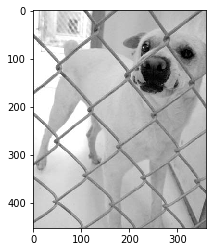

In [2]:
DATADIR = "Datasets/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    #print(path)
    #print(os.listdir(path))
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [3]:
print(img_array.shape)

(453, 360)


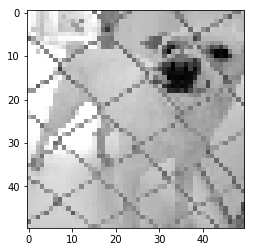

In [4]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()
            

100%|██████████| 12501/12501 [03:02<00:00, 68.44it/s]


In [6]:
print(len(training_data))

24946


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:5]:
    print(sample[1])

0
0
1
0
0


In [9]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[217]
   [220]
   [222]
   ...
   [217]
   [225]
   [223]]

  [[216]
   [220]
   [221]
   ...
   [227]
   [225]
   [225]]

  [[217]
   [224]
   [222]
   ...
   [228]
   [226]
   [223]]

  ...

  [[146]
   [149]
   [152]
   ...
   [131]
   [102]
   [164]]

  [[142]
   [147]
   [152]
   ...
   [164]
   [167]
   [165]]

  [[138]
   [142]
   [148]
   ...
   [174]
   [168]
   [164]]]]


In [10]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

In [11]:
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [13]:
pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

In [20]:
X = X/255.0

NAME = "Cats-vs-dogs-CNN-{}".format(int(time.time()))

In [23]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) #converts 3D features to 1D features

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3, callbacks=[tensorboard])

Train on 17462 samples, validate on 7484 samples
Epoch 1/10
17462/17462 [==============================] - 73s 4ms/sample - loss: 0.6932 - acc: 0.4945 - val_loss: 0.6932 - val_acc: 0.4976
Epoch 2/10
17462/17462 [==============================] - 94s 5ms/sample - loss: 0.6932 - acc: 0.4993 - val_loss: 0.6932 - val_acc: 0.4976
Epoch 3/10
17462/17462 [==============================] - 94s 5ms/sample - loss: 0.6932 - acc: 0.5007 - val_loss: 0.6932 - val_acc: 0.4976
Epoch 4/10
17462/17462 [==============================] - 94s 5ms/sample - loss: 0.6932 - acc: 0.4996 - val_loss: 0.6932 - val_acc: 0.4976
Epoch 5/10
17462/17462 [==============================] - 96s 6ms/sample - loss: 0.6932 - acc: 0.4994 - val_loss: 0.6932 - val_acc: 0.4976
Epoch 6/10
17462/17462 [==============================] - 99s 6ms/sample - loss: 0.6932 - acc: 0.4903 - val_loss: 0.6931 - val_acc: 0.4976
Epoch 7/10
17462/17462 [==============================] - 102s 6ms/sample - loss: 0.6932 - acc: 0.4998 - val_loss: 0.